In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [92]:
df = pd.read_csv('/Users/supisara/Desktop/ML dataset/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Convert booleans to binary and ensure categorical consistency
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)
df['VisitorType'] = df['VisitorType'].astype(str)

# Separate features and target variable
X = df.drop(columns='Revenue')
y = df['Revenue']

# Specify categorical and numerical columns
categorical_cols = ['Month', 'VisitorType']
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.drop(['Weekend']).tolist()

# Define preprocessing pipeline: scale numeric features and encode categorical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

### Imports and CV setting

In [94]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Create consistent evaluation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, pos_label=1, average='binary')

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

# Build a Logistic Regression pipeline
lr_pipeline = ImbPipeline([
    ('preprocessor', preprocessor), # Handle scaling and encoding
    ('smote', SMOTE(random_state=42)), # Oversample the minority class
    ('classifier', LogisticRegression(max_iter=1000, random_state=42)) # Ensure convergence and reproducibility
])

# Evaluate using stratified CV and F1 score
lr_scores = cross_val_score(lr_pipeline, X, y, cv=cv, scoring=scorer, error_score='raise', n_jobs=-1)

# Print results
print("LR Scores Across Folds:", lr_scores)
print("LR F1 Mean:", lr_scores.mean())
print("LR F1 Std Dev:", lr_scores.std())

LR Scores Across Folds: [0.61682243 0.5941873  0.59613428 0.60817547 0.60887949]
LR F1 Mean: 0.6048397954128066
LR F1 Std Dev: 0.008488711078035128


### K-Nearest Neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN pipeline
knn_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor), # Handle scaling and encoding
    ('smote', SMOTE(random_state=42)), # Oversample the minority class
    ('knn', KNeighborsClassifier(n_neighbors=5)) # KNN with k=5
])

# Evaluate using stratified CV and F1 score
knn_scores = cross_val_score(knn_pipeline, X, y, cv=cv, scoring=scorer, error_score='raise', n_jobs=-1)

# Print results
print("KNN Scores Across Folds:", knn_scores)
print("KNN F1 Mean:", knn_scores.mean())
print("KNN F1 Std Dev:", knn_scores.std())

KNN Scores Across Folds: [0.49198869 0.4934334  0.5027933  0.52007299 0.49861496]
KNN F1 Mean: 0.5013806666052927
KNN F1 Std Dev: 0.010103623674444104


### Support Vector Machine

In [39]:
from sklearn.svm import SVC

# Build a SVM pipeline
svm_pipeline = ImbPipeline([
    ('preprocessor', preprocessor), # Handle scaling and encoding
    ('smote', SMOTE(random_state=42)), # Oversample the minority class
    ('classifier', SVC(kernel='linear', probability=True, random_state=42)) # Linear SVM with probability estimates
])

# Evaluate using stratified CV and F1 score
svm_scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring=scorer, error_score='raise', n_jobs=-1)

# Print results
print("SVM Scores Across Folds:", svm_scores)
print("SVM F1 Mean:", svm_scores.mean())
print("SVM F1 Std Dev:", svm_scores.std())

SVM Scores Across Folds: [0.65866957 0.64871194 0.64197531 0.6652221  0.65384615]
SVM F1 Mean: 0.6536850165647938
SVM F1 Std Dev: 0.007997810127020699


### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Build a Random Forest pipeline
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor), # Handle scaling and encoding
    ('smote', SMOTE(random_state=42)), # Oversample the minority class
    ('classifier', RandomForestClassifier(random_state=42)) # Ensure reproducibility
])

# Evaluate using stratified CV and F1 score
rf_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring=scorer, error_score='raise', n_jobs=-1)

# Print results
print("RF Scores Across Folds:", rf_scores)
print("RF F1 Mean:", rf_scores.mean())
print("RF F1 Std Dev:", rf_scores.std())

RF Scores Across Folds: [0.70483461 0.66666667 0.68238213 0.6957606  0.66918239]
RF F1 Mean: 0.6837652789401032
RF F1 Std Dev: 0.014796894948194582


### XGBoost

In [86]:
from xgboost import XGBClassifier

# Build a XGBoost pipeline
xgb_pipeline = ImbPipeline([
    ('preprocessor', preprocessor), # Handle scaling and encoding
    ('smote', SMOTE(random_state=42)), # Oversample the minority class
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42)) # Use log loss metric and ensure reproducibility
])

# Evaluate using stratified CV and F1 score
xgb_scores = cross_val_score(xgb_pipeline, X, y, cv=cv, scoring=scorer, error_score='raise', n_jobs=-1)

# Print results
print("XGB Scores Across Folds:", xgb_scores)
print("XGB F1 Mean:", xgb_scores.mean())
print("XGB F1 Std Dev:", xgb_scores.std())

XGB Scores Across Folds: [0.67297297 0.63673469 0.66666667 0.65768194 0.64456233]
XGB F1 Mean: 0.6557237216871011
XGB F1 Std Dev: 0.013463128045538928


### Model Comparison

In [37]:
import pandas as pd

# Create a DataFrame summarising model performance with F1 scores
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'XGBoost'],
    'F1 Mean': [lr_scores.mean(), knn_scores.mean(),  svm_scores.mean(), rf_scores.mean(), xgb_scores.mean()],
    'F1 Std Dev': [lr_scores.std(), knn_scores.std(), svm_scores.std(), rf_scores.std(), xgb_scores.std()]
})

# Print results
print(results_df)

                 Model   F1 Mean  F1 Std Dev
0  Logistic Regression  0.604840    0.008489
1                  KNN  0.501381    0.010104
2                  SVM  0.653685    0.007998
3        Random Forest  0.683765    0.014797
4              XGBoost  0.655724    0.013463


### Boxplots Comparison

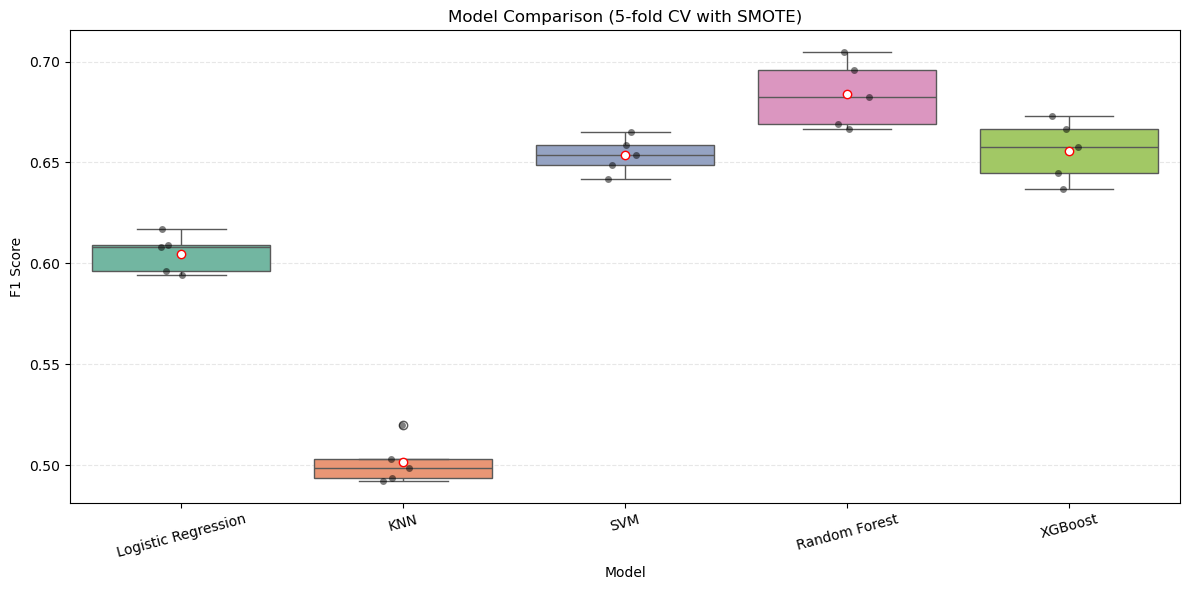

In [88]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import numpy as np


# Define models
models = {
    'Logistic Regression': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'KNN': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ]),
     'SVM': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', SVC(kernel='linear', random_state=42))
    ]),
    'Random Forest': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'XGBoost': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', XGBClassifier(
            eval_metric='logloss',
            random_state=42
        ))])
}

# Evaluation with consistent methodology
results = []
for name, pipeline in models.items():
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scorer, n_jobs=-1)
    for fold_idx, score in enumerate(scores, 1):
        results.append({
            'Model': name,
            'Fold': f'Fold {fold_idx}',
            'F1 Score': score
        })

results_df = pd.DataFrame(results)

# Boxplots visualisation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='F1 Score', data=results_df, palette='Set2', 
           showmeans=True,
           meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'red'})
sns.stripplot(x='Model', y='F1 Score', data=results_df, color='black', alpha=0.5, jitter=0.1)
plt.title('Model Comparison (5-fold CV with SMOTE)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()